In [1]:
import pandas as pd
movies = pd.read_csv('all_movies_with_id.csv')
movies.head(5)

,ID,Movie_Name,Score,Review_People,Star_Distribution,Craw_Date,Username,Date,Star,Comment,Comment_Distribution,Like
0,0,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,尾黑,2018-06-23,3,成本低廉的PPT电影，用Nico生命中最后一年发生的事给Nico的歌配上情节，倒不算尴尬。女...,66%31%3%,4
1,1,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,大奇特(Grinch),2018-06-28,3,传记片能做到半真半假的真实，就成功一半了，然后就是走进人物的内心世界。这部影片做到了纪录片般...,66%31%3%,4
2,2,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,西楼尘,2018-07-01,3,意大利房东记得他的嚣张，岔开大腿抽着烟说，我的计划是成为优雅的老女人。总念错名字的劳拉记得她...,66%31%3%,2
3,3,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,张晚禾,2018-06-28,3,意大利电影周开幕片,66%31%3%,0
4,4,"1988年的妮可 Nico, 1988",7.5,565,15.2%48.2%32.3%3.4%0.8%,2019-10-05,汪金卫,2018-06-29,3,【中国电影资料馆展映】歌星Nico的最后三年，青春不再，人气不再，衰老暴躁，在漂泊不定的巡回...,66%31%3%,1


In [2]:
movies.drop_duplicates(inplace= True)
print(movies.isnull().sum())

ID                         0
Movie_Name                 0
Score                      0
Review_People              0
Star_Distribution          0
Craw_Date                  0
Username                1785
Date                       0
Star                       0
Comment                    7
Comment_Distribution       0
Like                       0
dtype: int64


In [3]:
movies = movies.dropna(subset = ['Comment'], axis=0)

In [4]:
m_df = movies[['Movie_Name', 'Review_People', 'Star', 'Comment']]
m_df.head()


,Movie_Name,Review_People,Star,Comment
0,"1988年的妮可 Nico, 1988",565,3,成本低廉的PPT电影，用Nico生命中最后一年发生的事给Nico的歌配上情节，倒不算尴尬。女...
1,"1988年的妮可 Nico, 1988",565,3,传记片能做到半真半假的真实，就成功一半了，然后就是走进人物的内心世界。这部影片做到了纪录片般...
2,"1988年的妮可 Nico, 1988",565,3,意大利房东记得他的嚣张，岔开大腿抽着烟说，我的计划是成为优雅的老女人。总念错名字的劳拉记得她...
3,"1988年的妮可 Nico, 1988",565,3,意大利电影周开幕片
4,"1988年的妮可 Nico, 1988",565,3,【中国电影资料馆展映】歌星Nico的最后三年，青春不再，人气不再，衰老暴躁，在漂泊不定的巡回...


In [5]:
# Descriptive statistics
pd.set_option('display.float_format', '{:.0f}'.format)
m_df[['Review_People', 'Star']].describe()

,Review_People,Star
count,10310982,10310982
mean,59460,3
std,116889,1
min,152,1
25%,6600,3
50%,17675,3
75%,56428,4
max,1628973,5


Text(0, 0.5, 'Frequency')

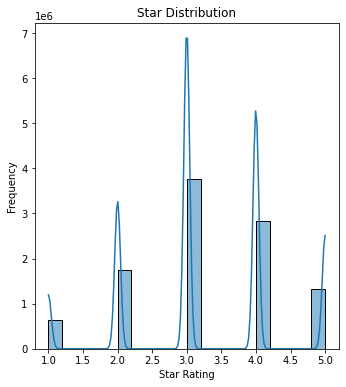

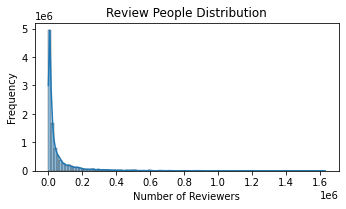

In [6]:
# Plot 'Star' and 'Review_People'
import matplotlib.pyplot as plt
import seaborn as sns
pd.reset_option('display.float_format')

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(m_df['Star'], kde=True, bins = 20)
plt.title('Star Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')

plt.figure(figsize = (12,6))
plt.subplot(2,2,2)
sns.histplot(m_df['Review_People'], kde = True, bins = 100)
plt.title('Review People Distribution')
plt.xlabel('Number of Reviewers')
plt.ylabel('Frequency')

The above graphs show that the most frequent star is 3 star, and the distribution is skewed towards positive ratings, since there are more frequency in the 3-5 range. In the Review People Distribution, most movies have relatively small number of reviews. However, the right tail indicates that a small number of movies have extremely large number of people writing reviews.

In [8]:
#Frequency tabulation

reviewer_counts = m_df['Review_People'].value_counts()
print(reviewer_counts)

movie_name_counts = m_df['Movie_Name'].value_counts()
print(movie_name_counts)

comment_counts = m_df['Comment'].value_counts()
print(comment_counts)

11664    4440
15002    4239
27171    4206
34915    4117
6928     4059
         ... 
345        51
381        49
518        46
395        39
398        37
Name: Review_People, Length: 8825, dtype: int64
遗落战境 Oblivion                           3000
刺客聂隐娘                                   3000
暮光之城2：新月 The Twilight Saga: New Moon    3000
独行侠 The Lone Ranger                     3000
重返十七岁 17 Again                          3000
                                        ... 
帕特诺 Paterno                               51
不可能的事 Breakthrough                        49
比利小子 The Kid                              46
威慑与恐吓 Shock and Awe                       39
尤利 Yuli                                   37
Name: Movie_Name, Length: 10269, dtype: int64
一般                                                                                            7867
3.5                                                                                           6009
无聊                                                         

The above result show that there are 10269 unique movies in the dataset and 9372770 unique comments to analyze. Some comments are short, just writing 'average', 'boring', 'alright', or 'good', whereas some comments are long. 

In [17]:
# Randomly sample 1% of the comments
sample_df = m_df.sample(frac=0.01, random_state=123)
print(f"Number of comments selected: {sample_df.shape[0]}")
sample_df.head()
filtered = sample_df[sample_df['Movie_Name'].str.contains(r'[a-zA-Z]',na = False)]
print(filtered.head())
filtered.shape

Number of comments selected: 103110
                                                Movie_Name  Review_People  \
2942453                             附注：我爱你 P.S. I Love You         116138   
9575730  对一个不容怀疑的公民的调查 Indagine su un cittadino al di s...           2126   
9052775                                            绝恋 Jude           3897   
325950                                        黑潮 Malcolm X           2467   
6825879                                黑水仙 Black Narcissus           1911   

         Star                                            Comment  
2942453     2  It has been years since last time I was almost...  
9575730     5  前几日在绵竹做访谈，一个从体制内跳出来的官员和我讲述为什么在当今官场无法独善其身，原因也就是...  
9052775     4       凯特·温丝莱特是个不错的演员！这部电影现在已经不怎么记得情节了，不过，当时，感觉还不错！  
325950      4  Spike Lee的镜头运用太棒了。用宗教平权，但未免有伊斯兰教独大和仇视白人之嫌。就白人在...  
6825879     3                      剧情有点拖沓 人物因为年代久远都比较扭曲动作很造作....  


(60761, 4)

In [18]:
import pandas as pd
import csv
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

nrc_file = 'Chinese-Simplified-NRC-EmoLex.txt'
nrc = pd.read_csv(nrc_file, sep = '\s+', header = 0)
nrc.to_csv('nrc_lexicon.csv', index = False)
print(nrc.shape)
nrc.sample(5, random_state=123)

(14154, 14)


,English,Word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,Chinese-Simplified,Word.1
13310,ungrateful,1,0,1,0,0,1,0,0,0,0,忘恩负义,NaN,NaN
222,adore,0,1,0,0,1,0,1,0,0,1,崇拜,NaN,NaN
1959,chalk,0,0,0,0,0,0,0,0,0,0,粉笔,NaN,NaN
8444,notoriety,1,0,1,1,0,1,1,0,0,0,恶名,NaN,NaN
7337,lightning,1,0,0,1,0,0,0,0,1,0,闪电,NaN,NaN


In [19]:
# Move the Chinese words in 'trust' column to 'Chinese-Simplified' column
nrc['Chinese-Simplified'] = nrc['trust']

# Reset 'trust' column to 0 
nrc['trust'] = 0  

# Delete redundant column such as 'Word.1'
nrc_cleaned = nrc.drop(columns=['Word.1'])

# Delete rows that include NaN
nrc_cleaned = nrc_cleaned.dropna()

# View the data after the fix
print(nrc_cleaned.head())

       English  Word  anger  anticipation  disgust  fear  joy  negative  \
0        aback     0      0             0        0     0    0         0   
1       abacus     0      0             0        0     0    0         0   
2      abandon     0      0             0        1     0    1         0   
3    abandoned     1      0             0        1     0    1         0   
4  abandonment     1      0             0        1     0    1         0   

   positive  sadness  surprise  trust Chinese-Simplified  
0         0        0         0      0                 吃惊  
1         0        0         1      0                 算盘  
2         1        0         0      0                 放弃  
3         1        0         0      0                  弃  
4         1        1         0      0                 放弃  


In [20]:
nrc_cleaned.to_csv('nrc_lexicon_fixed.csv', index=False)

In [21]:
nrc_df = pd.read_csv('nrc_lexicon_fixed.csv')
print(nrc_df.head())

       English  Word  anger  anticipation  disgust  fear  joy  negative  \
0        aback     0      0             0        0     0    0         0   
1       abacus     0      0             0        0     0    0         0   
2      abandon     0      0             0        1     0    1         0   
3    abandoned     1      0             0        1     0    1         0   
4  abandonment     1      0             0        1     0    1         0   

   positive  sadness  surprise  trust Chinese-Simplified  
0         0        0         0      0                 吃惊  
1         0        0         1      0                 算盘  
2         1        0         0      0                 放弃  
3         1        0         0      0                  弃  
4         1        1         0      0                 放弃  


In [22]:
import pandas as pd
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer

# Define tokenize function and separate each word in the comments
def tokenize(text):
    tokens = jieba.lcut(text)
    return ' '.join(tokens)  # 用空格连接分词结果，返回字符串

# Tokenize the text in the Comment column
filtered['tokenized_comment'] = filtered['Comment'].apply(tokenize)

# View data after tokenization
print(filtered[['Comment', 'tokenized_comment']].head())


                                                   Comment  \
2942453  It has been years since last time I was almost...   
9575730  前几日在绵竹做访谈，一个从体制内跳出来的官员和我讲述为什么在当今官场无法独善其身，原因也就是...   
9052775       凯特·温丝莱特是个不错的演员！这部电影现在已经不怎么记得情节了，不过，当时，感觉还不错！   
325950   Spike Lee的镜头运用太棒了。用宗教平权，但未免有伊斯兰教独大和仇视白人之嫌。就白人在...   
6825879                      剧情有点拖沓 人物因为年代久远都比较扭曲动作很造作....   

                                         tokenized_comment  
2942453  It   has   been   years   since   last   time ...  
9575730  前几日 在 绵竹 做 访谈 ， 一个 从 体制 内 跳 出来 的 官员 和 我 讲述 为什么...  
9052775  凯特 · 温丝 莱特 是 个 不错 的 演员 ！ 这部 电影 现在 已经 不怎么 记得 情节...  
325950   Spike   Lee 的 镜头 运用 太棒了 。 用 宗教 平权 ， 但 未免 有 伊斯兰...  
6825879         剧情 有点 拖沓   人物 因为 年代久远 都 比较 扭曲 动作 很 造作 ....  


/var/folders/_b/fllrq8ln02scfsn_77v9b4bm0000gn/T/ipykernel_4468/2820340883.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['tokenized_comment'] = filtered['Comment'].apply(tokenize)


In [23]:
# Calculate TF-IDF using TfidfVectorizer 
vectorizer = TfidfVectorizer()  # Not using stopwords to deal with Chinese words

# Calculate TF-IDF of the comments after tokenization
tfidf_matrix = vectorizer.fit_transform(filtered['tokenized_comment'])

# Correspond words with the index in matrix
feature_names = vectorizer.get_feature_names_out()

# View the shape of TF-IDF matrix（Comment × Word）
print(tfidf_matrix.shape)


(60761, 70005)


In [24]:
# Calculate the sum of tf-idf in each comment
filtered['tfidf_sum'] = tfidf_matrix.sum(axis=1)

# Rank the comment, and comments with high tf-idf score come top
filtered_sorted = filtered.sort_values(by='tfidf_sum', ascending=False)

# View comments which come top
print(filtered_sorted[['Comment', 'tfidf_sum']].head())


                                                   Comment  tfidf_sum
3968835  这是一部宣扬资本主义正能量的影片，看到毒液，就会想起小贱贱，这种反英雄路线越来越讨喜，絮絮叨...  10.292754
9578504  2.5-3。前面就是賣慘，還有「醒醒吧你沒有富爸爸／女朋友」，所謂寫實性僅是放在超英電影可一...  10.226732
8484839  爱情是一层薄薄的轻纱，内里人性善恶才是力道所在。生活自有其鄙视链，冷漠贯串每一个环节。很多时...  10.134843
2399751  CC伯格曼作品集修复版重刷，目前画质最佳版本。像这种影史巨片，每次重刷都能全新发现一处别样优...  10.082633
9597448  Jacques Audiard真是匠师手笔……把反套路的原作拍得更传神了。这本来该是一个关于...  10.047638


/var/folders/_b/fllrq8ln02scfsn_77v9b4bm0000gn/T/ipykernel_4468/2940817915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['tfidf_sum'] = tfidf_matrix.sum(axis=1)


In [25]:
# Choose the top 100 comments with the highest tf-idf score
top_comments_df = filtered_sorted.head(100)
top_comments_df.head()


,Movie_Name,Review_People,Star,Comment,tokenized_comment,tfidf_sum
3968835,毒液：致命守护者 Venom,605483,4,这是一部宣扬资本主义正能量的影片，看到毒液，就会想起小贱贱，这种反英雄路线越来越讨喜，絮絮叨...,这是 一部 宣扬 资本主义 正 能量 的 影片 ， 看到 毒液 ， 就 会 想起 小贱 贱 ...,10.292754
9578504,小丑 Joker,28177,3,2.5-3。前面就是賣慘，還有「醒醒吧你沒有富爸爸／女朋友」，所謂寫實性僅是放在超英電影可一...,2.5 - 3 。 前面 就是 賣慘 ， 還有 「 醒醒 吧 你 沒 有富 爸爸 ／ 女朋友...,10.226732
8484839,恐惧吞噬灵魂 Angst essen Seele auf,7894,5,爱情是一层薄薄的轻纱，内里人性善恶才是力道所在。生活自有其鄙视链，冷漠贯串每一个环节。很多时...,爱情 是 一层 薄薄的 轻纱 ， 内里 人性 善恶 才 是 力道 所在 。 生活 自有 其 ...,10.134843
2399751,第七封印 Det sjunde inseglet,33035,5,CC伯格曼作品集修复版重刷，目前画质最佳版本。像这种影史巨片，每次重刷都能全新发现一处别样优...,CC 伯格曼 作品集 修复 版 重刷 ， 目前 画质 最佳 版本 。 像 这种 影史 巨片 ...,10.082633
9597448,希斯特斯兄弟 The Sisters Brothers,9235,5,Jacques Audiard真是匠师手笔……把反套路的原作拍得更传神了。这本来该是一个关于...,Jacques Audiard 真是 匠师 手笔 … … 把 反 套路 的 原作 拍得 ...,10.047638


In [27]:
import jieba
pd.set_option('display.max_colwidth', None)

# Define sentiment analysis function
def analyze_sentiment(tokens):
    emotions_count = {
        'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0,
        'joy': 0, 'negative': 0, 'positive': 0, 'sadness': 0,
        'surprise': 0, 'trust': 0
    }
    
    # Match each token
    for token in tokens:
        matches = nrc_df[nrc_df['Chinese-Simplified'] == token]
        if not matches.empty:
            for _, match in matches.iterrows():
                for emotion in emotions_count:
                    emotions_count[emotion] += int(match[emotion])
    
    return emotions_count

# Do sentiment analysis on comments in 'top_comments_df' dataset
top_comments_df['sentiment'] = top_comments_df['tokenized_comment'].apply(lambda x: analyze_sentiment(x.split()))

# View the result of sentiment analysis
print(top_comments_df[['Comment', 'sentiment']].head())


                                                                                                                                                                                                                                                                                                                                                                                                                              Comment  \
3968835                                                                 这是一部宣扬资本主义正能量的影片，看到毒液，就会想起小贱贱，这种反英雄路线越来越讨喜，絮絮叨叨的唐僧式吐槽，一下子就把影迷变成了同党。事实上这也算是漫威编剧的某种转型，靠光伟正圈粉的时代已经过去，可萌可贱可风骚的汤老湿，如果配上抖音快手的鬼畜节奏肯定爆红。汤老湿演出了嘴炮＋情感专家的人设，当然很多网友对40分钟罗里吧嗦的平平剧情表示抗议，好在被毒液的热辣登场挽救，花式撩汉给满分点赞，片名改为霸道外星人爱上我。这种抖S基腐桥段惹得豆瓣一片拥护。所以观影提示就是要降低预期搭配2倍速，因为漫威这次摆明了就是将R级片拍成儿童片，挺《寄生兽》的。管电锯的也没怎么对PG13下手，难道是因为惩恶扬善的结尾，或是反酒驾的公益广告？彩蛋都挺长的，索尼大法好PS4植入很自然。但是难忘的是斯坦李老爷子的路人甲。   
9578504        2.5-3。前面就是賣慘，還有「醒醒吧你沒有富爸爸／女朋友」，所謂寫實性僅是放在超英電影可一提，比較好玩的情節與設定，多數像是對Taxi Driver或The King of Comedy的直接挪用與致意（如以手為槍、與Robert De Niro的對戲）。Joaqui

/var/folders/_b/fllrq8ln02scfsn_77v9b4bm0000gn/T/ipykernel_4468/3311610086.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_comments_df['sentiment'] = top_comments_df['tokenized_comment'].apply(lambda x: analyze_sentiment(x.split()))


In [28]:
# Define sentiment list
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']

# Calculate the sum of each sentiment in the top 100 comments
emotion_totals = {emotion: 0 for emotion in emotions}

# Sum the sentiment count in each comment
for index, row in top_comments_df.iterrows():
    for emotion in emotions:
        emotion_totals[emotion] += row['sentiment'][emotion]

# Convert the result into a DataFrame
emotion_totals_df = pd.DataFrame(list(emotion_totals.items()), columns=['Emotion', 'Count'])

# Output sentiment sum total
print(emotion_totals_df)


        Emotion  Count
0         anger    627
1  anticipation    428
2       disgust    684
3          fear    579
4           joy   1343
5      negative   1495
6      positive    658
7       sadness    411
8      surprise    734
9         trust      0
